### Project Number: [0002]

# **STAGE 4. DATA WRANGLING**

### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh') 

### Import Data

---

In [2]:
# Путь к данным
data_path = r'D:/Data_Science_Project/2. Exploratory Data Analysis/[0011] Project 3 - СберМаркет/'

# data_path = r'/media/ruslan/Data/Data_Science_Project/2. Exploratory Data Analysis/[0011] Project 3 - СберМаркет/'

In [3]:
# Загрузка наборов данных 
orders = pd.read_feather(data_path + '/orders.file')
delivery_windows = pd.read_feather(data_path + '/delivery_windows.file')
stores = pd.read_feather(data_path + '/stores.file')
addresses = pd.read_feather(data_path + '/addresses.file')
replacements = pd.read_feather(data_path + '/replacements.file')
cancellations = pd.read_feather(data_path + '/cancellations.file')

## SECTION 4.1 CLEAN DATA


### _Addressing missing or invalid data_

---

По результатам предварительной подготовки данных (Stage 2. Preliminary data wrangling) выявлено, что в исходных данных имеются пропуски и дублирующие значения. Обработаем их перед дальнейшим анализом.

#### orders

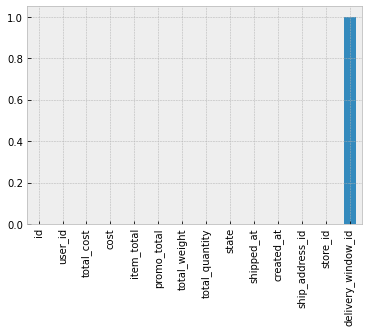

Количество пропущенных значений: 1


In [4]:
# Оценка количества пропущенных значений
orders.isnull().sum().plot(kind='bar')
plt.show()
print("Количество пропущенных значений: {}".format(orders.isnull().sum().sum()))

В наборе имеется одно пропущенное значение.  Удалим его.  

In [5]:
# Введем переменную orders_w = orders wangling 
orders_w = orders.dropna()

# Проверка результата. 
print("Количество пропущенных значений: {}".format(orders_w.isnull().sum().sum()))

Количество пропущенных значений: 0


#### addresses

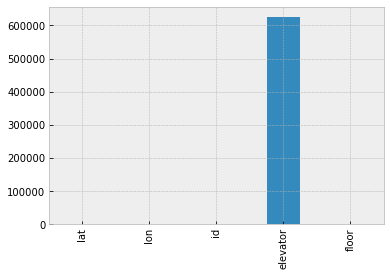

Количество пропущенных значений: 625065


In [6]:
# Оценка количества пропущенных значений
addresses.isnull().sum().plot(kind='bar')
plt.show()
print("Количество пропущенных значений: {}".format(addresses.isnull().sum().sum()))

In [7]:
# Оценка распределения уникальных значений 
addresses['elevator'].value_counts(dropna=False)

NaN          625065
passenger    204400
none           5418
Name: elevator, dtype: int64

 В переменной ```elevator``` имеется  625065 значений NaN и 5418 none, остальные значения указывают на тип лифта _passenger_. 
 Примем, что переменная принимает бинарные значения:
- 1 - наличие лифта = __passenger__
- 0 - отсутствие лифта = значения NaN и none. Заменим эти значения на переменную __absent__


In [8]:
# Замена пропущенных значений 
addresses['elevator'] = addresses['elevator'].fillna('absent')

# Замена  значений none
addresses['elevator'] = addresses['elevator'].replace('none', 'absent')

# Проверка результата 
addresses['elevator'].value_counts(dropna=False)

absent       630483
passenger    204400
Name: elevator, dtype: int64

In [9]:
# Введем переменную addresses_w = addresses wangling 
addresses_w = addresses

# Проверка результата. 
print("Количество пропущенных значений: {}".format(addresses.isnull().sum().sum()))

Количество пропущенных значений: 0


### _Data type conversions_

---

По результатам предварительной подготовки данных (Stage 2. Preliminary data wrangling) и предварительного разведочного анализа данных установлено, что следующие переменные имеют тип object
- orders
	- state
- delivery_windows
	- time_zone
- addresses
	- elevator
	- floor
- replacements
	- state
- cancellations
	- state
    
Выполним анализ и конвертацию типов данных указанных переменных.

#### orders

In [10]:
# Оценка распределения уникальных значений 
orders['state'].value_counts(dropna=False)

shipped     334225
canceled        13
pending          7
Name: state, dtype: int64

In [11]:
# Приведем переменную к типу данных category
orders['state'] = orders['state'].astype('category')

# Проверка результата. 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334245 entries, 0 to 334244
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  334245 non-null  int64         
 1   user_id             334245 non-null  int64         
 2   total_cost          334245 non-null  float64       
 3   cost                334245 non-null  float64       
 4   item_total          334245 non-null  int64         
 5   promo_total         334245 non-null  float64       
 6   total_weight        334245 non-null  int64         
 7   total_quantity      334245 non-null  int64         
 8   state               334245 non-null  category      
 9   shipped_at          334245 non-null  datetime64[ns]
 10  created_at          334245 non-null  datetime64[ns]
 11  ship_address_id     334245 non-null  int64         
 12  store_id            334245 non-null  int64         
 13  delivery_window_id  334244 no

#### delivery_windows

In [12]:
# Оценка распределения уникальных значений 
delivery_windows['time_zone'].value_counts(dropna=False)

Europe/Moscow         365113
Europe/Samara          10130
Asia/Yekaterinburg      6385
Asia/Omsk               4460
Europe/Kaliningrad        69
Name: time_zone, dtype: int64

In [13]:
# Приведем переменную к типу данных category
delivery_windows['time_zone'] = delivery_windows['time_zone'].astype('category')

# Проверка результата. 
delivery_windows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386157 entries, 0 to 386156
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   store_id   386157 non-null  int64         
 1   id         386157 non-null  int64         
 2   starts_at  386157 non-null  datetime64[ns]
 3   ends_at    386157 non-null  datetime64[ns]
 4   time_zone  386157 non-null  category      
dtypes: category(1), datetime64[ns](2), int64(2)
memory usage: 12.2 MB


#### addresses

In [14]:
# Оценка распределения уникальных значений 
addresses['elevator'].value_counts(dropna=False)

absent       630483
passenger    204400
Name: elevator, dtype: int64

In [15]:
addresses['elevator'] = addresses['elevator'].astype('category')

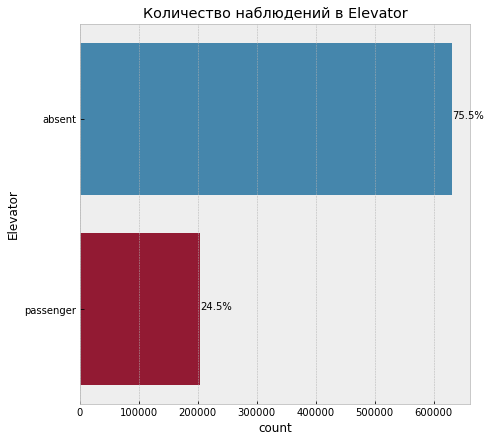

In [16]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=addresses.elevator, order = addresses.elevator.value_counts().index);
ax.set_title('Количество наблюдений в Elevator');
ax.set(ylabel='Elevator')

total = len(addresses['elevator'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

In [17]:
addresses['floor'].value_counts(dropna=False)

-                         345461
1                          53258
3                          48645
2                          47039
4                          45638
                           ...  
79261374325                    1
1123                           1
Вход со стороны дороги         1
19                             1
150                            1
Name: floor, Length: 1015, dtype: int64

In [18]:
addresses['floor']  = pd.to_numeric(addresses['floor'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

In [19]:
addresses['floor'].value_counts(dropna=False)

0        386097
1         53373
3         48712
2         47138
4         45683
          ...  
22777         1
70            1
129           1
18181         1
97            1
Name: floor, Length: 159, dtype: int64

In [20]:
# Оценка распределения уникальных значений 
addresses['floor'].dtype

dtype('int32')

In [21]:
addresses['floor'].describe()

count    8.348830e+05
mean    -1.440275e+05
std      1.758720e+07
min     -2.147484e+09
25%      0.000000e+00
50%      1.000000e+00
75%      6.000000e+00
max      3.434234e+06
Name: floor, dtype: float64

In [22]:
addresses.loc[addresses['floor'] < 0, 'floor'] = 0

In [23]:
addresses.loc[addresses['floor'] > 100, 'floor'] = addresses['floor'].quantile(0.75)

In [24]:
addresses['floor'].value_counts(dropna=False)

0.0     387142
1.0      53373
3.0      48712
2.0      47138
4.0      45683
         ...  
97.0         1
91.0         1
69.0         1
70.0         1
86.0         1
Name: floor, Length: 80, dtype: int64

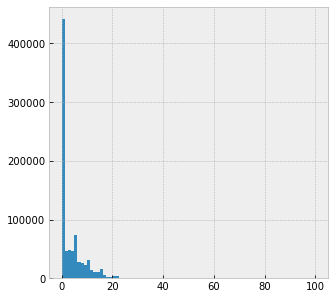

In [25]:
# Гистограмма распределения значений 
addresses['floor'].hist(bins=80, figsize=(5,5))
plt.show()

In [26]:
addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834883 entries, 0 to 834882
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   lat       834883 non-null  float64 
 1   lon       834883 non-null  float64 
 2   id        834883 non-null  int64   
 3   elevator  834883 non-null  category
 4   floor     834883 non-null  float64 
dtypes: category(1), float64(3), int64(1)
memory usage: 26.3 MB


#### replacements

In [27]:
# Оценка распределения уникальных значений 
replacements['state'].value_counts(dropna=False)

replaced    328318
Name: state, dtype: int64

In [28]:
replacements['state'] = replacements['state'].astype('category')

In [29]:
replacements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328318 entries, 0 to 328317
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   order_id  328318 non-null  int64   
 1   item_id   328318 non-null  int64   
 2   state     328318 non-null  category
dtypes: category(1), int64(2)
memory usage: 5.3 MB


#### cancellations

In [30]:
# Оценка распределения уникальных значений 
cancellations['state'].value_counts(dropna=False)

canceled    507208
Name: state, dtype: int64

In [31]:
cancellations['state'] = cancellations['state'].astype('category')

In [32]:
cancellations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507208 entries, 0 to 507207
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   order_id  507208 non-null  int64   
 1   item_id   507208 non-null  int64   
 2   state     507208 non-null  category
dtypes: category(1), int64(2)
memory usage: 8.2 MB


### _Deduplicating data_

---

По результатам предварительной подготовки данных (Stage 2. Preliminary data wrangling) выявлено, что в следующих наборах имеется дублирующие значения: 
- delivery_windows
- replacements
- cancellations

Удалим дублирующие значения.

#### delivery_windows

In [33]:
print("Дублирующих строк: {}".format(delivery_windows.duplicated().sum()))

Дублирующих строк: 248659


В наборе delivery_windows дублирующие строки могут представлять значимую информацию: заказы, которые повторялись на один и тот же адрес. Оставим на текущий момент без изменений.

#### replacements

In [34]:
print("Дублирующих строк: {}".format(replacements.duplicated().sum()))

Дублирующих строк: 176


In [35]:
# Удаление дублирующих значений
replacements = replacements.drop_duplicates()

# Проверка результата
print("Дублирующих строк: {}".format(replacements.duplicated().sum()))

Дублирующих строк: 0


#### cancellations

In [36]:
print("Дублирующих строк: {}".format(cancellations.duplicated().sum()))

Дублирующих строк: 89


In [37]:
# Удаление дублирующих значений
cancellations = cancellations.drop_duplicates()

# Проверка результата
print("Дублирующих строк: {}".format(cancellations.duplicated().sum()))

Дублирующих строк: 0


### _Filtering to the desired subset of data_

---

#### addresses

Предварительный разведочный анализ данных показал, что в наборе addresses имеется точки с координатами (0,0), которые в значительной степени смещают наблюдения.  

In [38]:
# Количество точек с координатой 0 
addresses['lon'].loc[addresses['lon'] == 0].value_counts(dropna=False)

0.0    15
Name: lon, dtype: int64

In [39]:
# Количество точек с координатой 0 
addresses['lat'].loc[addresses['lat'] == 0].value_counts(dropna=False)

0.0    15
Name: lat, dtype: int64

In [40]:
# Заменим данные значения на среднее значение 
addresses.loc[addresses['lon'] == 0, 'lon'] = addresses['lon'].mean()
addresses.loc[addresses['lat'] == 0, 'lat'] = addresses['lat'].mean()

In [41]:
# Проверка результата
addresses['lon'].loc[addresses['lon'] == 0].value_counts(dropna=False)

Series([], Name: lon, dtype: int64)

In [42]:
# Проверка результата
addresses['lat'].loc[addresses['lat'] == 0].value_counts(dropna=False)

Series([], Name: lat, dtype: int64)

## SECTION 4.2 DATA TRANSFORMATION


Для дальнейшего исследования объединим данные в два набора. 

Наборы:
- orders
- delivery_windows
- stores
- addresses

В набор hassle_free_orders

Наборы:
- replacements
- cancellations

problematic_orders

In [43]:
def verify_data_quality(evaluated_dataset):
    '''
    ФУНКЦИЯ КОМПЛЕКСНОЙ ОЦЕНКИ КАЧЕСТВА ДАННЫХ
    '''
    # Проверка типов данных
    print("Типы данных:\n{}\n".format(evaluated_dataset.dtypes) + '_' * 50+ '\n')
   
    # Проверка наличия значений NaN
    print("Общее количество пропущенных значений:\n{}\n".format(evaluated_dataset.isnull().sum().sum()) + '_' * 50+ '\n')
    
    evaluated_dataset.isnull().sum().plot(kind='bar')
    # Add a title and show the plot.
    plt.title('Распределение пропущенных значений по столбцам')
    # Create tick mark labels on the Y axis and rotate them.
    plt.xticks(rotation = 90)
    # Create X axis label.
    plt.xlabel("Columns")
    # Create Y axis label.
    plt.ylabel("NaN Values");
    
    # Количество значений, отличных от NaN
    print("Количество значений, отличных от NaN:\n{}\n".format(evaluated_dataset.count().sum()) + '_' * 50+ '\n')
    
    # Поиск дублирующих строк 
    print("Дублирующих строк:\n{}\n".format(evaluated_dataset.duplicated().sum()) + '_' * 50+ '\n')
    
    # Форма нарбора данных
    print("Форма нарбора данных:\n{}\n".format(evaluated_dataset.shape) + '_' * 50+ '\n')
   
    # Тип индекса набора данных
    print("Тип индекса набора данных:\n{}\n".format(evaluated_dataset.index) + '_' * 50+ '\n')

#### hassle_free_orders

In [44]:
delivery_windows = delivery_windows.rename(columns={"id": "delivery_window_id"})
delivery_windows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386157 entries, 0 to 386156
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   store_id            386157 non-null  int64         
 1   delivery_window_id  386157 non-null  int64         
 2   starts_at           386157 non-null  datetime64[ns]
 3   ends_at             386157 non-null  datetime64[ns]
 4   time_zone           386157 non-null  category      
dtypes: category(1), datetime64[ns](2), int64(2)
memory usage: 12.2 MB


In [45]:
orders_delivery_windows = pd.merge(orders, delivery_windows, on=['delivery_window_id','store_id'], how='left')
orders_delivery_windows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251700 entries, 0 to 1251699
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1251700 non-null  int64         
 1   user_id             1251700 non-null  int64         
 2   total_cost          1251700 non-null  float64       
 3   cost                1251700 non-null  float64       
 4   item_total          1251700 non-null  int64         
 5   promo_total         1251700 non-null  float64       
 6   total_weight        1251700 non-null  int64         
 7   total_quantity      1251700 non-null  int64         
 8   state               1251700 non-null  category      
 9   shipped_at          1251700 non-null  datetime64[ns]
 10  created_at          1251700 non-null  datetime64[ns]
 11  ship_address_id     1251700 non-null  int64         
 12  store_id            1251700 non-null  int64         
 13  delivery_win

In [46]:
stores = stores.rename(columns={"id": "store_id"})
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   store_id     41 non-null     int64
 1   city         41 non-null     int64
 2   retailer_id  41 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [47]:
orders_delivery_windows_stores =  pd.merge(orders_delivery_windows, stores, on='store_id', how='left')
orders_delivery_windows_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251700 entries, 0 to 1251699
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1251700 non-null  int64         
 1   user_id             1251700 non-null  int64         
 2   total_cost          1251700 non-null  float64       
 3   cost                1251700 non-null  float64       
 4   item_total          1251700 non-null  int64         
 5   promo_total         1251700 non-null  float64       
 6   total_weight        1251700 non-null  int64         
 7   total_quantity      1251700 non-null  int64         
 8   state               1251700 non-null  category      
 9   shipped_at          1251700 non-null  datetime64[ns]
 10  created_at          1251700 non-null  datetime64[ns]
 11  ship_address_id     1251700 non-null  int64         
 12  store_id            1251700 non-null  int64         
 13  delivery_win

In [48]:
addresses = addresses.rename(columns={"id": "ship_address_id"})
addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834883 entries, 0 to 834882
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   lat              834883 non-null  float64 
 1   lon              834883 non-null  float64 
 2   ship_address_id  834883 non-null  int64   
 3   elevator         834883 non-null  category
 4   floor            834883 non-null  float64 
dtypes: category(1), float64(3), int64(1)
memory usage: 26.3 MB


In [49]:
orders_delivery_windows_stores_addresses =  pd.merge(orders_delivery_windows_stores, addresses, on='ship_address_id', how='left')
orders_delivery_windows_stores_addresses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251700 entries, 0 to 1251699
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1251700 non-null  int64         
 1   user_id             1251700 non-null  int64         
 2   total_cost          1251700 non-null  float64       
 3   cost                1251700 non-null  float64       
 4   item_total          1251700 non-null  int64         
 5   promo_total         1251700 non-null  float64       
 6   total_weight        1251700 non-null  int64         
 7   total_quantity      1251700 non-null  int64         
 8   state               1251700 non-null  category      
 9   shipped_at          1251700 non-null  datetime64[ns]
 10  created_at          1251700 non-null  datetime64[ns]
 11  ship_address_id     1251700 non-null  int64         
 12  store_id            1251700 non-null  int64         
 13  delivery_win

In [50]:
hassle_free_orders = orders_delivery_windows_stores_addresses

Типы данных:
id                             int64
user_id                        int64
total_cost                   float64
cost                         float64
item_total                     int64
promo_total                  float64
total_weight                   int64
total_quantity                 int64
state                       category
shipped_at            datetime64[ns]
created_at            datetime64[ns]
ship_address_id                int64
store_id                       int64
delivery_window_id           float64
starts_at             datetime64[ns]
ends_at               datetime64[ns]
time_zone                   category
city                         float64
retailer_id                  float64
lat                          float64
lon                          float64
elevator                    category
floor                        float64
dtype: object
__________________________________________________

Общее количество пропущенных значений:
3820
__________________________

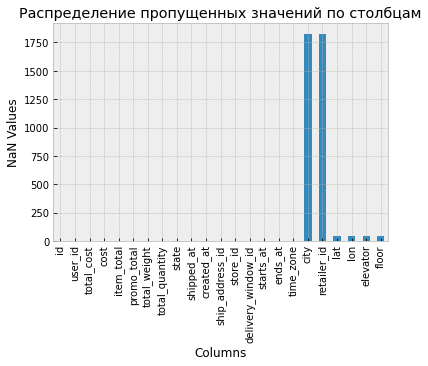

In [51]:
verify_data_quality(hassle_free_orders)

In [52]:
# Удаление дублирующих значений
hassle_free_orders = hassle_free_orders.drop_duplicates()

# Проверка результата
print("Дублирующих строк: {}".format(hassle_free_orders.duplicated().sum()))

Дублирующих строк: 0


In [53]:
# Удаление пропущенных значений
hassle_free_orders = hassle_free_orders.dropna()

# Проверка результата
print("Количество пропущенных значений: {}".format(hassle_free_orders.isnull().sum().sum()))

Количество пропущенных значений: 0


#### problematic_orders

In [54]:
problematic_orders = pd.concat([replacements, cancellations], ignore_index=True)
problematic_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835261 entries, 0 to 835260
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   order_id  835261 non-null  int64 
 1   item_id   835261 non-null  int64 
 2   state     835261 non-null  object
dtypes: int64(2), object(1)
memory usage: 19.1+ MB


In [55]:
# Приведем переменную к типу данных category
problematic_orders['state'] = problematic_orders['state'].astype('category')

In [56]:
problematic_orders.tail()

,order_id,item_id,state
835256,5271730,28144890,canceled
835257,5271730,28138493,canceled
835258,5512004,28164137,canceled
835259,5512004,28164246,canceled
835260,5316955,28151512,canceled


Типы данных:
order_id       int64
item_id        int64
state       category
dtype: object
__________________________________________________

Общее количество пропущенных значений:
0
__________________________________________________

Количество значений, отличных от NaN:
2505783
__________________________________________________

Дублирующих строк:
0
__________________________________________________

Форма нарбора данных:
(835261, 3)
__________________________________________________

Тип индекса набора данных:
RangeIndex(start=0, stop=835261, step=1)
__________________________________________________



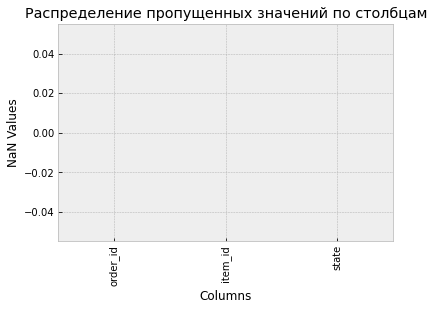

In [57]:
verify_data_quality(problematic_orders)

## SECTION 4.4 CONCLUSIONS

In [58]:
# Сохраниение промежуточных результатов дальнейшего анализа
pd.DataFrame.to_feather(hassle_free_orders.reset_index(drop=True), 'hassle_free_orders.file')

In [59]:
pd.DataFrame.to_feather(problematic_orders.reset_index(drop=True), 'problematic_orders.file')